In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Set Seaborn style
sns.set_style('darkgrid')

In [2]:
top_n = 10
# ds_name = "Yelp"

In [3]:
results = pd.read_csv(f"results/all_results_{top_n}.csv")

In [4]:
results.head(10)

,Dataset,Model,Fusion,all_pre,leisure_pre,working_pre,all_rec,leisure_rec,working_rec,all_ndcg,leisure_ndcg,working_ndcg,delta
0,Gowalla,GeoSoCa,mul,0.0344,0.0655,0.0205,0.0329,0.0257,0.0397,0.0368,0.0679,0.0226,0.0453
1,Gowalla,GeoSoCa,sum,0.0335,0.0589,0.0210,0.0339,0.0225,0.0403,0.0354,0.0610,0.0224,0.0386
2,Gowalla,GeoSoCa,local,0.0346,0.0610,0.0220,0.0350,0.0236,0.0422,0.0365,0.0624,0.0238,0.0386
3,Gowalla,GeoSoCa,local_1,0.0333,0.0588,0.0215,0.0337,0.0226,0.0415,0.0349,0.0601,0.0223,0.0378
4,Gowalla,GeoSoCa,local_2,0.0351,0.0623,0.0225,0.0354,0.0240,0.0426,0.0370,0.0636,0.0242,0.0394
5,Gowalla,GeoSoCa,local_3,0.0346,0.0610,0.0220,0.0350,0.0236,0.0422,0.0365,0.0624,0.0238,0.0386
6,Gowalla,GeoSoCa,w117,0.0322,0.0564,0.0211,0.0326,0.0214,0.0407,0.0339,0.0579,0.0220,0.0359
7,Gowalla,GeoSoCa,w144,0.0329,0.0583,0.0211,0.0330,0.0220,0.0408,0.0349,0.0609,0.0222,0.0387
8,Gowalla,GeoSoCa,w171,0.0329,0.0583,0.0211,0.0330,0.0220,0.0408,0.0349,0.0609,0.0222,0.0387
9,Gowalla,GeoSoCa,w333,0.0335,0.0589,0.0210,0.0339,0.0225,0.0403,0.0354,0.0610,0.0224,0.0386


In [5]:
def linechart_df_creator():
    # fusion_results_group = ds_results_group.get_group(dataset).groupby("Fusion")
    linechart_df = pd.DataFrame(columns=["Dataset", "Model", "Weight", "Delta"])
    # print(fusion_results_group.get_group(fusion))
    for eachline in results.itertuples():
        if eachline.Fusion not in ["mul", "sum", "main", "local", "local_1", "local_2", "local_3"]:
        # barchart_df = barchart_df.append({"Model": eachline.Model, "Group": "Leisure", "nDCG": eachline.leisure_ndcg}, ignore_index=True)
        # barchart_df = barchart_df.append({"Model": eachline.Model, "Group": "Working", "nDCG": eachline.working_ndcg}, ignore_index=True)
            linechart_df = linechart_df.append({"Dataset": eachline.Dataset, "Model": eachline.Model, "Weight": eachline.Fusion, "Delta": eachline.delta}, ignore_index=True)
    return linechart_df

In [6]:
linechart_df = linechart_df_creator()
linechart_df

,Dataset,Model,Weight,Delta
0,Gowalla,GeoSoCa,w117,0.0359
1,Gowalla,GeoSoCa,w144,0.0387
2,Gowalla,GeoSoCa,w171,0.0387
3,Gowalla,GeoSoCa,w333,0.0386
4,Gowalla,GeoSoCa,w414,0.0384
5,Gowalla,GeoSoCa,w441,0.0390
6,Gowalla,GeoSoCa,w711,0.0390
7,Gowalla,LORE,w117,0.0396
8,Gowalla,LORE,w144,0.0395
9,Gowalla,LORE,w171,0.0394


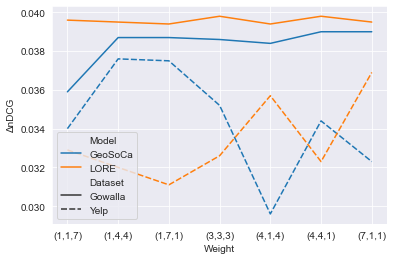

In [16]:
g = sns.lineplot(data=linechart_df, x="Weight", y="Delta", hue="Model", style="Dataset")
g.set_xticklabels(['(1,1,7)', '(1,4,4)', '(1,7,1)', '(3,3,3)', '(4,1,4)', '(4,4,1)', '(7,1,1)'])
g.set_ylabel("ΔnDCG")
plt.savefig("plots/results/linechart.pdf")